# Importing the necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy

In [2]:
warnings.filterwarnings("ignore")
sns.set(color_codes=True)


Import the data

In [3]:
data= pd.read_csv('insurance.csv')

# EDA

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Shape of data

In [5]:
print("The size of the data is", data.shape)
print("rows",data.shape[0])
print("columns",data.shape[1])

The size of the data is (1338, 7)
rows 1338
columns 7


## Data type of each attribute/columns

In [6]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

## Check for missing values


In [7]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No missing values

## Five point summary

In [8]:
data[['age','bmi','charges']].describe()

,age,bmi,charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


## Distributions of BMI, AGE and CHARGES columns

<AxesSubplot:xlabel='age', ylabel='Density'>

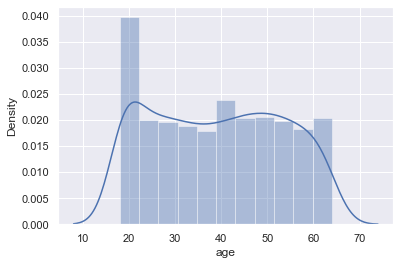

In [9]:
sns.distplot(data['age'])

<AxesSubplot:xlabel='bmi', ylabel='Density'>

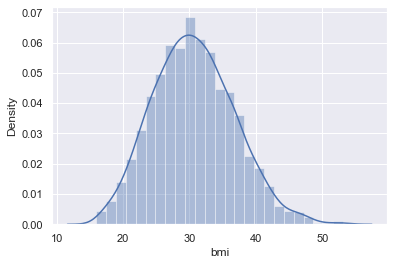

In [10]:
sns.distplot(data['bmi'])

<AxesSubplot:xlabel='charges', ylabel='Density'>

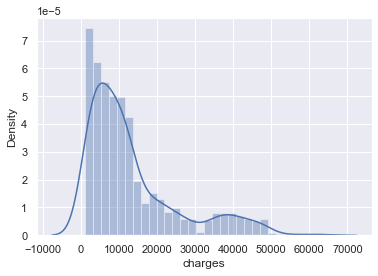

In [11]:
sns.distplot(data['charges'])

## Skewness of Age, BMI and charges

In [12]:
print('Skewness of attribute: Age =',data['age'].skew())
print('Skewness of attribute: BMI =',data['bmi'].skew())
print('Skewness of attribute: Charges =',data['charges'].skew())

Skewness of attribute: Age = 0.05567251565299186
Skewness of attribute: BMI = 0.2840471105987448
Skewness of attribute: Charges = 1.5158796580240388


## Distribution of categorical data

<AxesSubplot:xlabel='sex', ylabel='count'>

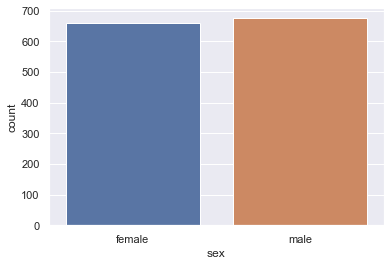

In [13]:
sns.countplot(data['sex'])

<AxesSubplot:xlabel='children'>

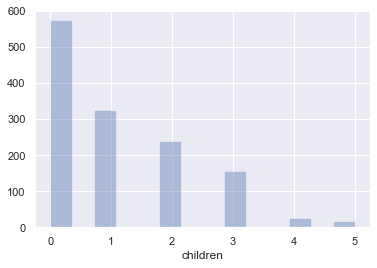

In [14]:
sns.distplot(data['children'], kde = False)

<AxesSubplot:xlabel='smoker'>

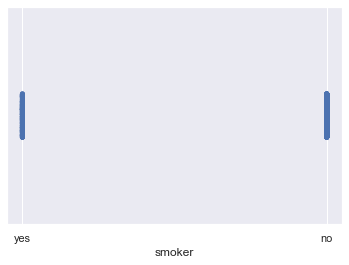

In [15]:
sns.stripplot(data['smoker'])

<AxesSubplot:xlabel='smoker', ylabel='count'>

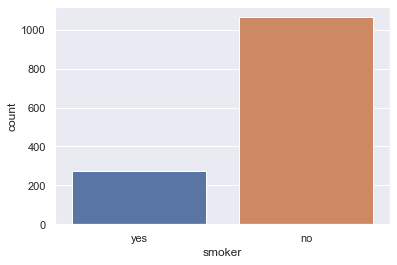

In [16]:
sns.countplot(data['smoker'])

<AxesSubplot:xlabel='count', ylabel='region'>

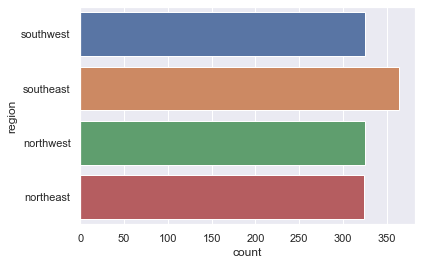

In [17]:
sns.countplot(y='region',data=data)

## Pairplot

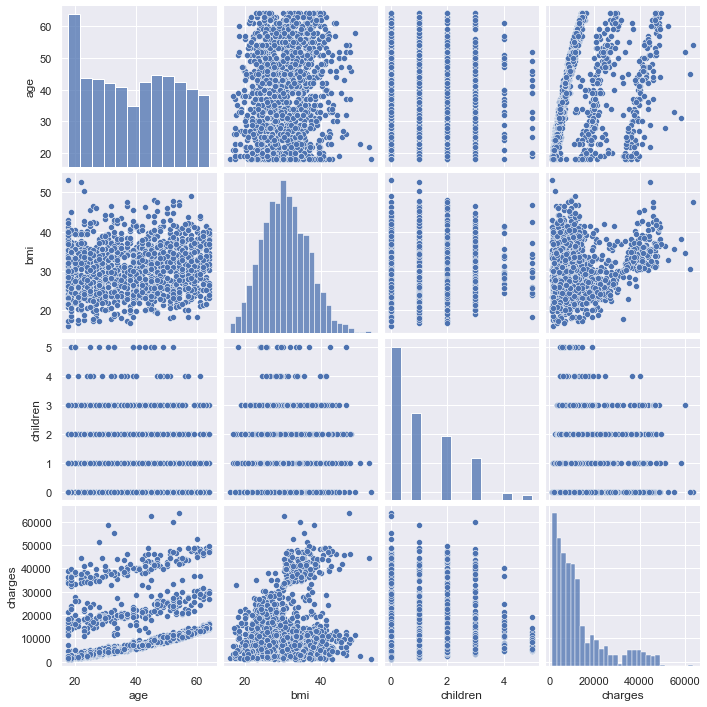

In [18]:
sns.pairplot(data)

# Check for outliers

### BMI

<AxesSubplot:xlabel='sex', ylabel='bmi'>

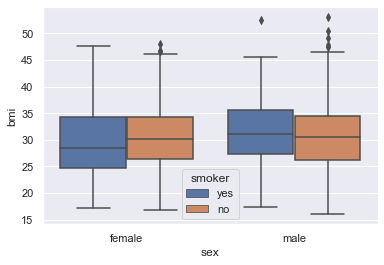

In [19]:
sns.boxplot(x='sex',y='bmi',hue='smoker',data=data)

<AxesSubplot:xlabel='sex', ylabel='bmi'>

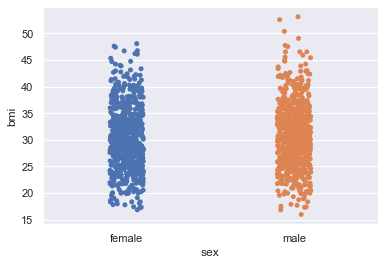

In [20]:
sns.stripplot(x='sex',y='bmi', data=data)

### Age

<AxesSubplot:xlabel='sex', ylabel='age'>

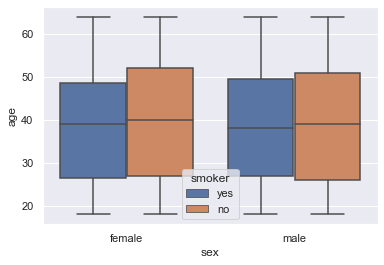

In [21]:
sns.boxplot(x='sex',y='age',hue='smoker', data=data)

### Charges

<AxesSubplot:xlabel='smoker', ylabel='charges'>

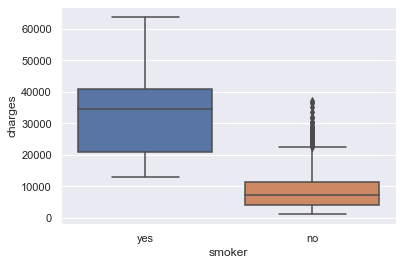

In [22]:
sns.boxplot(x='smoker',y='charges', data=data)

### Calculate the IQR and upper bound value for the above columns

From the above plots it can be inferred that BMI and charges have extremes but age doesn't, it can be calculated as

In [23]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
iqr=q3-q1

In [24]:
iqr

age            24.000000
bmi             8.397500
children        2.000000
charges     11899.625365
dtype: float64

In [25]:
upper_bound = q3 +(1.5 * iqr)

In [26]:
# upper_bound

In [27]:
print('Upper bound value for BMI :',upper_bound[1])
print('Upper bound value for Charges :',upper_bound[3])

Upper bound value for BMI : 47.290000000000006
Upper bound value for Charges : 34489.350562499996


## Hypothesis Testing

## Do charges of people who smoke differ significantly from the people who don't?

<AxesSubplot:xlabel='smoker', ylabel='charges'>

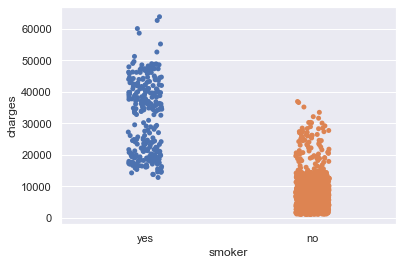

In [28]:
sns.stripplot(x='smoker',y='charges',data=data)

### From the plot it seems that they differ significantly. Let's perform Independant t_test. Set the signifacance level at 5%

In [29]:
Ho='Charges of smoker and non smoker are same'
Ha='Charges of smoker and non smoker differ significantly'

In [30]:
x=data[data['smoker']=='yes'].charges
x=np.array(x)
y=np.array(data[data['smoker']=='no'].charges)

In [31]:
t, p_value  = stats.ttest_ind(x,y, axis = 0)

In [32]:
if p_value<0.05:
    print (f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print (f'{Ho} as the p_value ({p_value}) > 0.05')

Charges of smoker and non smoker differ significantly as the p_value (8.271435842177219e-283) < 0.05


## Does BMI of male and female differ significantly ?

<AxesSubplot:xlabel='bmi', ylabel='sex'>

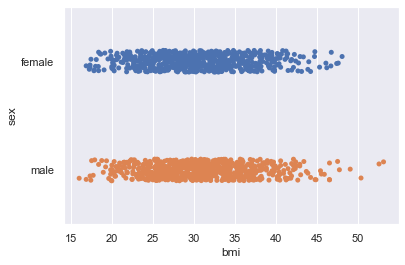

In [33]:
sns.stripplot(x='bmi',y='sex',data=data)

### Visually gender seems to play no role in BMI. Again performing T_test and set signifance level at 5%

In [34]:
Ho = "BMI of men and women don't differ significantly"   
Ha = "BMI of men and women differ significantly"   

x = np.array(data[data['sex'] == 'male'].bmi)  
y = np.array(data[data['sex'] == 'female'].bmi) 

t, p_value  = stats.ttest_ind(x,y, axis = 0)  
if p_value < 0.05: 
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

BMI of men and women don't differ significantly as the p_value (0.08997637178984932) > 0.05


## Is the proportion of smokers significantly different in different genders?

In [35]:
Ho = "Proportion of smokers don't differ based on sex"   
Ha = "Proportion of smokers differ significantly in different genders"   

crosstab = pd.crosstab(data['sex'],data['smoker'])  

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Proportion of smokers differ significantly in different genders as the p_value (0.007) < 0.05


smoker,no,yes
sex,,
female,547,115
male,517,159


### Is the distribution of bmi across women with no children, one child and two children, the same?

In [36]:
Ho = "No. of children has no effect on bmi"  
Ha = "No. of children has an effect on bmi"   


female_df = copy.deepcopy(data[data['sex'] == 'female'])



<AxesSubplot:xlabel='children', ylabel='bmi'>

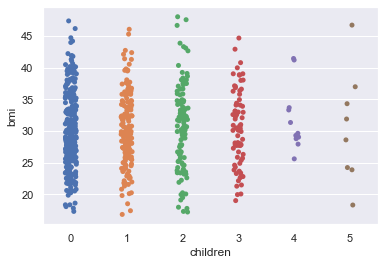

In [37]:
sns.stripplot(x='children',y='bmi',data=female_df)

### Neglecting the outliers, it seems that no of children has no effect on BMI of women

In [38]:

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']


f_stat, p_value = stats.f_oneway(zero,one,two)


if p_value < 0.05:  
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

No. of children has no effect on bmi as the p_value (0.716) > 0.05
